# GLD 360 Data

In [1]:
from pymatreader import read_mat

import numpy as np
from datetime import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import metpy  # noqa: F401
import xarray
import pandas as pd

from celluloid import Camera
import cartopy.feature as cfeature
from IPython.display import HTML
import ffmpeg
from matplotlib import animation, rc
import cartopy
from matplotlib import animation, rc
from pymatreader import read_mat
import matplotlib.patches as mpatches

from shapely import geometry
import os

# cartopy                   0.17.0          py36hd759880_1006    conda-forge
# python                    3.6.13               h12debd9_1  


In [2]:
#os.system("conda list")
#os.system("conda install -c conda-forge cartopy")
#os.system("conda create -n test_env python=3.8 cartopy=0.18")
#os.system("pip install proj geos")

The .mat file has the actual data. The “events” variable has GLD360 data. The first 9 columns are year/month/day/hour/minute/second/lat/lon/peak-current.

In [3]:
# conda install pymatreader
#os.system("pip install ffmpeg")
#os.system("conda install -c conda-forge ffmpeg")
#os.system("conda install -c conda-forge openh264")

In [4]:
# A["Events"] is for the structure in matlab file

A = read_mat('/data/edworak/data/2021-06-28-Bortnik.mat')
df_a = pd.DataFrame(A['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])

#select all columns except last four 
june28 = df_a.loc[:, ~df_a.columns.isin(["j",  "k", "l", "m"])]

B = read_mat('/data/edworak/data/2021-06-29-Bortnik.mat')
df_b = pd.DataFrame(B['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june29 = df_b.loc[:, ~df_b.columns.isin(["j",  "k", "l", "m"])]

C = read_mat('/data/edworak/data/2021-06-30-Bortnik.mat')
df_c = pd.DataFrame(C['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june30 = df_c.loc[:, ~df_c.columns.isin(["j",  "k", "l", "m"])]

D = read_mat('/data/edworak/data/2021-07-01-Bortnik.mat')
df_d = pd.DataFrame(D['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
july1 = df_d.loc[:, ~df_d.columns.isin(["j",  "k", "l", "m"])]


lightning = (june28, june29, june30, july1)
lightning[0]["peak-current"].min()
lightning[0]["peak-current"].max()
#print(june29.dtypes)
june29


,year,month,day,hour,minute,second,lat,lon,peak-current
0,2021.0,6.0,29.0,0.0,0.0,0.999711,58.008667,-122.242737,6.0
1,2021.0,6.0,29.0,0.0,0.0,14.823615,57.929129,-122.399080,5.0
2,2021.0,6.0,29.0,0.0,0.0,25.336774,58.044840,-122.300274,-2.0
3,2021.0,6.0,29.0,0.0,0.0,25.574771,58.018106,-122.384231,-15.0
4,2021.0,6.0,29.0,0.0,0.0,25.591675,57.988811,-122.392837,6.0
...,...,...,...,...,...,...,...,...,...
343929,2021.0,6.0,29.0,23.0,59.0,43.234558,61.486415,-123.933304,4.0
343930,2021.0,6.0,29.0,23.0,59.0,47.378508,62.045677,-123.253987,92.0
343931,2021.0,6.0,29.0,23.0,59.0,52.184560,61.414957,-124.061316,-8.0
343932,2021.0,6.0,29.0,23.0,59.0,52.356805,61.509726,-123.930586,-1.0


In [5]:
lightning[0]

,year,month,day,hour,minute,second,lat,lon,peak-current
0,2021.0,6.0,28.0,0.0,14.0,47.056748,50.155087,-102.721578,-9.0
1,2021.0,6.0,28.0,0.0,14.0,47.056927,50.153628,-102.722275,-21.0
2,2021.0,6.0,28.0,0.0,14.0,47.056963,50.155838,-102.719836,-9.0
3,2021.0,6.0,28.0,0.0,14.0,47.057129,50.153755,-102.721025,-12.0
4,2021.0,6.0,28.0,0.0,14.0,47.057211,50.154096,-102.683930,-10.0
...,...,...,...,...,...,...,...,...,...
52455,2021.0,6.0,28.0,23.0,59.0,19.640940,58.023400,-122.350108,10.0
52456,2021.0,6.0,28.0,23.0,59.0,26.730642,57.961614,-122.355913,5.0
52457,2021.0,6.0,28.0,23.0,59.0,47.073756,57.959312,-122.394804,3.0
52458,2021.0,6.0,28.0,23.0,59.0,58.803859,58.020387,-122.358495,23.0


# Count lightning Strikes: GLD 360

In [6]:
num_strikes_pyrocb = np.zeros(4)

def strikes_pyrocb(df):
    for i in range(0,4):
        strikes_pyrocb = (df[i].loc[(df[i]["lon"] > -122) & (df[i]["lon"] < -119) & (df[i]["lat"] > 48) & (df[i]["lat"] < 52)])
        num_strikes_pyrocb[i] = len(strikes_pyrocb)
    return(num_strikes_pyrocb)

In [7]:
strikes_pyrocb(lightning)

array([   0.,   33., 1018., 5580.])

## Trying animation with new data 

In [8]:
june30_21to24 = june30[(june30["hour"] >= 21) & (june30["hour"] <= 23)]
july1_0to5 = july1[(july1["hour"] >= 0) & (july1["hour"] <= 5)]

In [9]:
frames = [june30_21to24, july1_0to5]

june30_july1_concat = pd.concat(frames)

june30_july1_concat

,year,month,day,hour,minute,second,lat,lon,peak-current
489437,2021.0,6.0,30.0,21.0,1.0,1.360371,55.906919,-125.544109,-172.0
489438,2021.0,6.0,30.0,21.0,1.0,1.373948,55.911638,-125.510750,-6.0
489439,2021.0,6.0,30.0,21.0,1.0,1.377672,55.917932,-125.550147,117.0
489440,2021.0,6.0,30.0,21.0,1.0,1.405507,55.890854,-125.562277,101.0
489441,2021.0,6.0,30.0,21.0,1.0,1.418747,55.894160,-125.559094,-23.0
...,...,...,...,...,...,...,...,...,...
304994,2021.0,7.0,1.0,5.0,59.0,59.728843,58.210157,-120.964126,2.0
304995,2021.0,7.0,1.0,5.0,59.0,59.771889,56.982407,-120.733129,-9.0
304996,2021.0,7.0,1.0,5.0,59.0,59.779541,56.980727,-120.889417,4.0
304997,2021.0,7.0,1.0,5.0,59.0,59.825850,57.044832,-121.079624,-3.0


[box tutorial]("https://stackoverflow.com/questions/55303911/add-polygon-box-to-cartopy-python")

In [10]:
# Region = july1('Region', field_names=['region_name','lonmin','lonmax','latmin','latmax'])

# sub_region =  Region(
#         region_name="pyrocb_region",
#         lonmin=-122,
#         lonmax=-199,
#         latmin=48,
#         latmax=53
# )
# lonmin,lonmax,latmin,latmax = subregion.lonmin,subregion.lonmax,subregion.latmin,subregion.latmax

def add_sub_region_box(ax, subregion):
    """
    https://groups.google.com/forum/#!topic/scitools-iris/LxR0EbQolyE
    Note:
    ----
    order is important:
        lower-left, upper-left, upper-right, lower-right
        2 -- 3
        |    |
        1 -- 4
    """
    geom = geometry.box(minx=-122,maxx=-120,miny=51,maxy=53)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=0.3)
    return ax


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '4000x4800', '-pix_fmt', 'rgba', '-r', '2.5', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'animation_june30_july1_concat.mp4']' returned non-zero exit status 255.

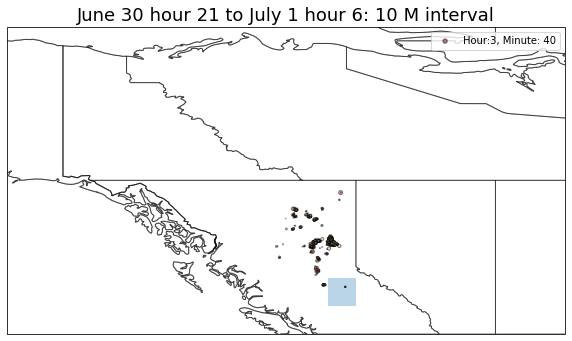

In [11]:
fig = plt.figure(figsize = (10, 12))
camera = Camera(fig)

# june30_july1_concat combines June 30 hours 21 - 24 to July 1 hours 0 - 5
#Longitude: 145 W to 105 W (or 140 W to 110 W)
#Latitude: 48 N to 67 N (or 50 N to 65 N)

hours = [21, 22, 23, 0, 1, 2, 3, 4, 5]
mins = range(0, 60, 10)

ax = plt.axes(projection=ccrs.PlateCarree())

for i in hours: 
    for j in mins: 
        #print("Hour:" + str(i) + ", Minute: " + str(j))
        
        # need set extent so axis dont change when you change what points you select 
        ax.set_extent([-145,-105,49,70])
        ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
               
        time = june30_july1_concat[(june30_july1_concat["hour"] == i) & (june30_july1_concat["minute"] > j) & (june30_july1_concat["minute"] < j + 5) & (june30_july1_concat["peak-current"] > 0)]
        #print(time)
        points = (time.loc[(time.lon > -130) & (time.lon < -100) & (time.lat > 45) & (time.lat < 65)])
        # points_rec = (time.loc[(time.lon > -122) & (time.lon < -199) & (time.lat > 48) & (time.lat < 53)])
        add_sub_region_box(ax, points)

        t = plt.scatter(x = points["lon"], y = points["lat"], c = points["peak-current"] * 0.001, cmap="OrRd", s = points["peak-current"] * 0.3, edgecolors="black", marker = 'o', alpha=0.5)
        ax.legend(["Hour:" + str(i) + ", Minute: " + str(j)])
        plt.title("June 30 hour 21 to July 1 hour 6: 10 M interval", fontsize = 18)
        camera.snap() 
    
animation = camera.animate(interval = 400, repeat = True, repeat_delay = 500, blit=True)

animation.save('animation_june30_july1_concat.mp4', dpi = 400) 
HTML(animation.to_html5_video())


/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


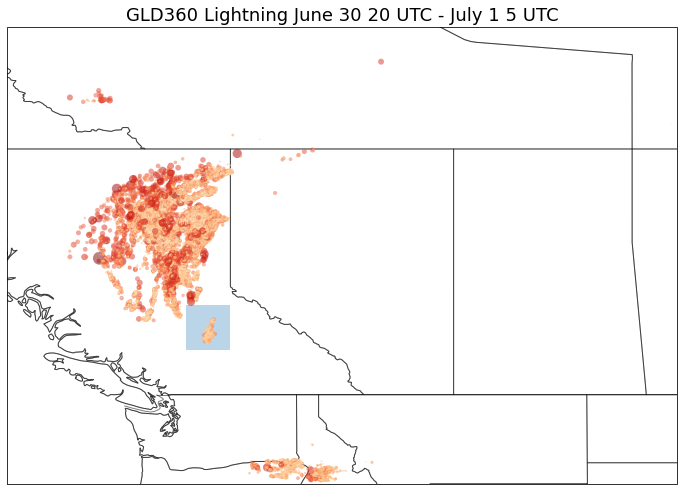

In [12]:
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
#plt.gcf().set_size_inches(20, 10)

points = (june30_july1_concat.loc[(june30_july1_concat.lon > -130) & (june30_july1_concat.lon < -100) & (june30_july1_concat.lat > 45) & (june30_july1_concat.lat < 65) & (june30_july1_concat["peak-current"] != 0)])
ax.set_extent([-130,-100, 45, 65])
# rect = mpatches.Rectangle((july1.lon == -122, july1.lon == -199), july1.lat == 48, july1.lat == 53, alpha = 0.5, facecolor="red") #fill=False
# plt.gca().add_patch(rect)

add_sub_region_box(ax, points)

plt.scatter(x = points["lon"], y = points["lat"], c = points["peak-current"] ** 0.001, cmap="OrRd", s = points["peak-current"] * 0.5, edgecolors="none", marker = 'o', alpha=0.5)


ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
plt.title("GLD360 Lightning June 30 20 UTC - July 1 5 UTC", fontsize = 18)
plt.savefig("GLD360 Lightning June 30 20 UTC - July 1 5 UTC", dpi = 200)
plt.show()




In [20]:
june30_23 = june30[(june30["hour"] == 23)]
july1_0to1 = july1[(july1["hour"] <= 1)]
frames = [june30_23, july1_0to1]

small_concat = pd.concat(frames)

small_concat

,year,month,day,hour,minute,second,lat,lon,peak-current
489834,2021.0,6.0,30.0,23.0,0.0,15.939636,51.364173,-120.959618,7.0
489835,2021.0,6.0,30.0,23.0,0.0,16.020451,51.318756,-120.964740,2.0
489836,2021.0,6.0,30.0,23.0,0.0,28.591415,51.319955,-120.982881,13.0
489837,2021.0,6.0,30.0,23.0,0.0,28.603679,51.327311,-120.983305,11.0
489838,2021.0,6.0,30.0,23.0,0.0,36.765382,51.341979,-120.936668,3.0
...,...,...,...,...,...,...,...,...,...
17484,2021.0,7.0,1.0,1.0,59.0,58.098345,53.272989,-124.127118,8.0
17485,2021.0,7.0,1.0,1.0,59.0,58.638044,54.261407,-121.561139,-5.0
17486,2021.0,7.0,1.0,1.0,59.0,59.617030,53.776647,-122.483993,3.0
17487,2021.0,7.0,1.0,1.0,59.0,59.673520,45.411203,-115.880375,8.0


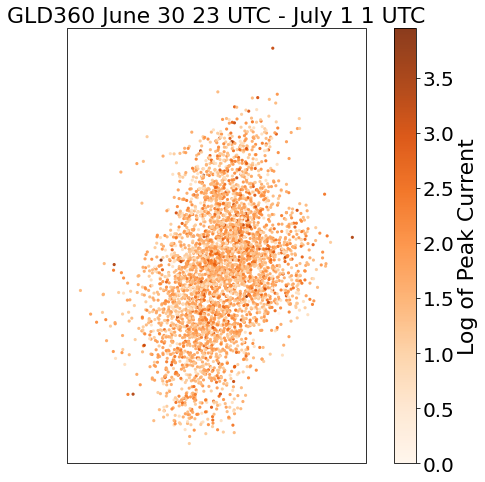

In [32]:
#fig = plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
plt.gcf().set_size_inches(10, 8)
#ax.set_extent([-122,-119, 48, 53])
#ax.set_extent([-128,-118, 50, 59])

#points = (small_concat.loc[(small_concat.lon > -130) & (small_concat.lon < -116) & (small_concat.lat > 46) & (small_concat.lat < 60) & (small_concat["peak-current"] != 0)])
points = (small_concat.loc[(small_concat.lon > -122) & (small_concat.lon < -119) & (small_concat.lat > 50) & (small_concat.lat < 53) & (small_concat["peak-current"] != 0)])

plt.scatter(x = points["lon"], y = points["lat"], c = np.log(points["peak-current"]) , cmap="Oranges", s = 10, edgecolors="none", marker = 'o', alpha=0.9)

cbar2 = plt.colorbar(shrink = 1)
for t in cbar2.ax.get_yticklabels():
     t.set_fontsize(20)
cbar2.set_label(label = "Log of Peak Current", fontsize = 22)
plt.title("Negative lightning July 1 0 UTC", fontsize = 24)

#add_sub_region_box(ax, points)

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
plt.title("GLD360 June 30 23 UTC - July 1 1 UTC", fontsize = 22)
plt.savefig("GLD360 June 30 23 UTC - July 1 1 UTC", dpi = 200)
plt.show()


